In [75]:
# Dependencies
import tensorflow

import numpy as np

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [76]:
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

In [77]:
# pandas, pandas_datareader, numpy and matplotlib
import numpy as np
import pandas as pd
#import pandas_datareader.data as web 
from matplotlib import pyplot

In [78]:
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [79]:
# stk_tickers = ['MSFT', 'IBM', 'GOOGL']
stk_tickers = ['ABBV', 'AMGN', 'AZN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS','GSK', 'HCM', 'HZNP', 'JNJ', 'LLY', 'MRK','NVO','NVS', 'OGN','PFE','SNY','TSVT']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

In [6]:
!pip install pandas-datareader

In [80]:
import pandas_datareader.data as web

In [175]:
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [176]:
return_period = 5 #Rendimiento Semanal

In [177]:
stk_data

Attributes   Adj Close                                                      \
Symbols           ABBV        AMGN        AZN        BIIB        BMY  CRXT   
Date                                                                         
2016-11-15   49.962429  128.372849  23.180246  322.579987  48.855831   NaN   
2016-11-16   48.905495  128.521240  22.987286  317.649994  48.433548   NaN   
2016-11-17   49.032639  128.634735  22.945339  319.299988  48.847218   NaN   
2016-11-18   48.094898  126.775391  22.752382  317.000000  48.916149   NaN   
2016-11-21   48.015423  127.054710  22.936953  318.320007  48.890293   NaN   
...                ...         ...        ...         ...        ...   ...   
2021-11-08  116.059998  211.369995  62.990002  272.700012  59.410000  5.25   
2021-11-09  115.610001  211.710007  62.700001  270.029999  59.459999  5.17   
2021-11-10  116.750000  213.210007  63.139999  266.929993  59.389999  4.98   
2021-11-11  116.629997  211.559998  62.919998  266.570007  59.189999  4.70   
2021-11-12  116.970001  211.389999  58.799999  270.429993  59.430000  4.67   

Attributes                                              ...     Volume  \
Symbols          GILD       GRFS        GSK        HCM  ...       HZNP   
Date                                                    ...              
2016-11-15  64.051773  14.068147  30.329737  11.800000  ...  2747700.0   
2016-11-16  63.758163  13.835172  29.745428  11.960000  ...  4375400.0   
2016-11-17  63.405819  13.897897  29.955780  12.010000  ...  3274400.0   
2016-11-18  62.600452  13.763487  29.690895  12.310000  ...  2996700.0   
2016-11-21  62.902454  13.808290  29.940195  12.490000  ...  1688900.0   
...               ...        ...        ...        ...  ...        ...   
2021-11-08  65.970001  12.500000  42.770000  30.030001  ...  2836500.0   
2021-11-09  66.150002  12.300000  42.730000  30.290001  ...  1514300.0   
2021-11-10  67.320000  12.300000  43.180000  30.020000  ...  1737000.0   
2021-11-11  67.430000  12.050000  43.230000  30.540001  ...  1000800.0   
2021-11-12  67.480003  11.980000  43.360001  31.049999  ...  1570900.0   

Attributes                                                           \
Symbols            JNJ        LLY         MRK        NVO        NVS   
Date                                                                  
2016-11-15   7446700.0  3097600.0   7640339.0  3836700.0  3210732.0   
2016-11-16   6594800.0  1922300.0  11297650.0  3179200.0  8151376.0   
2016-11-17   5730300.0  4519200.0   8762642.0  2400500.0  3512387.0   
2016-11-18   7717800.0  4571600.0   8066351.0  3781200.0  3198233.0   
2016-11-21   5843300.0  4060300.0   7164862.0  3988600.0  3130938.0   
...                ...        ...         ...        ...        ...   
2021-11-08   5578800.0  2386100.0  18655700.0   952400.0  2232200.0   
2021-11-09   6112800.0  1963800.0  10512000.0   690900.0  2026700.0   
2021-11-10   6225100.0  2215100.0   9855900.0   967200.0  2509000.0   
2021-11-11   4118800.0  1739400.0   5761500.0  1035700.0  3162100.0   
2021-11-12  18982100.0  1964000.0   8203900.0   550000.0  1754800.0   

Attributes                                              
Symbols           OGN         PFE        SNY      TSVT  
Date                                                    
2016-11-15        NaN  31213472.0  1731700.0       NaN  
2016-11-16        NaN  23864246.0  1532700.0       NaN  
2016-11-17        NaN  27502549.0  1878700.0       NaN  
2016-11-18        NaN  25460846.0  2216900.0       NaN  
2016-11-21        NaN  23053931.0  1171500.0       NaN  
...               ...         ...        ...       ...  
2021-11-08  3474500.0  57423300.0   865600.0  547300.0  
2021-11-09  2567400.0  29920400.0  1291500.0  404200.0  
2021-11-10  4025500.0  42696200.0  1134200.0  815000.0  
2021-11-11  5810200.0  42370400.0   606300.0  344100.0  
2021-11-12  2531100.0  27766700.0  1064200.0  511100.0  

[1258 rows x 120 columns]

<AxesSubplot:xlabel='Date'>

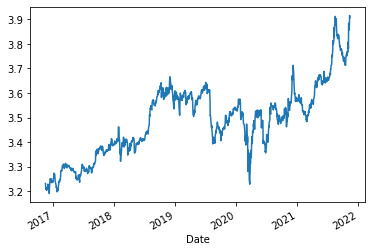

In [178]:
np.log(stk_data.loc[:, ('Adj Close', 'PFE')]).plot()

<AxesSubplot:xlabel='Date'>

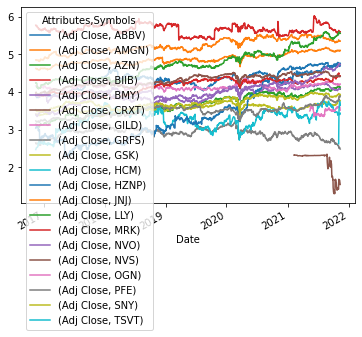

In [179]:
np.log(stk_data.loc[:, ('Adj Close', stk_tickers)]).plot()

In [180]:
#%matplotlib 

C:\Users\silve\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


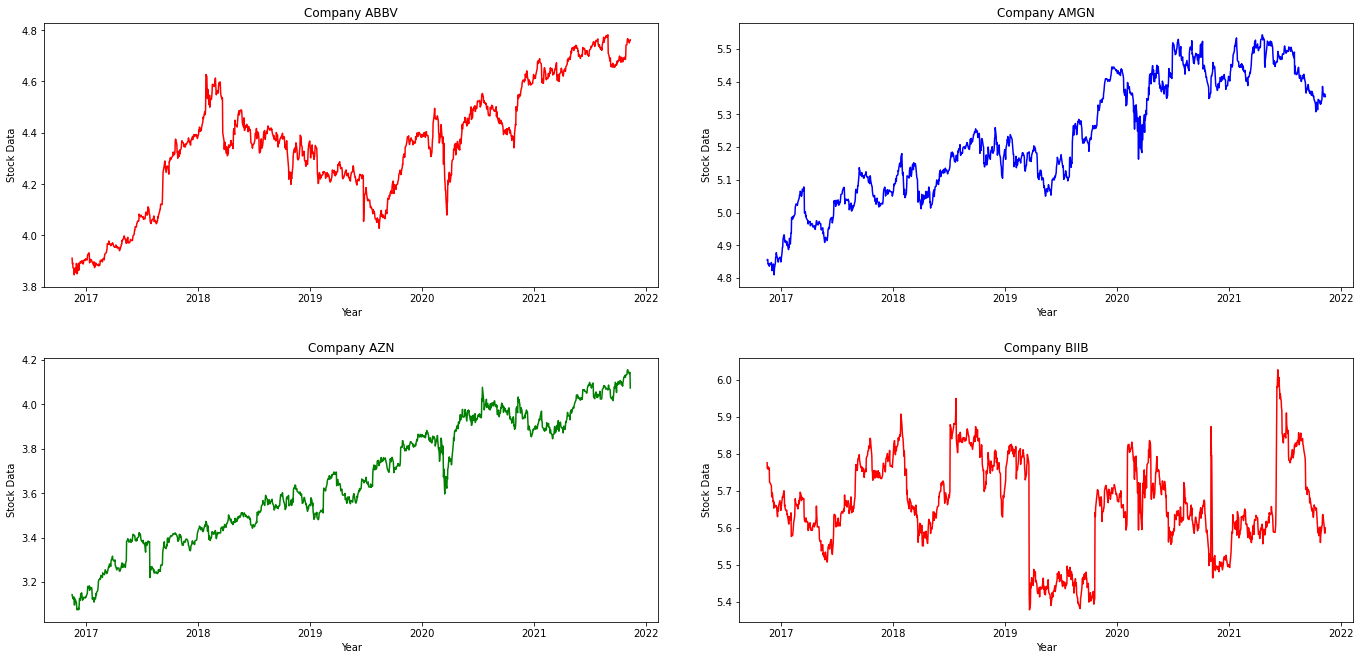

In [181]:
import matplotlib.pyplot as plt
# Tickers change
def test(to_plot,ax, r_count, c_count, c,s):
    #fig,ax = plt.subplots(1,2)
    #plt.subplot(1,2,2)
    #plt.plot(month, customer1, color="red", label="Customer 1", marker="o")
    ax[r_count,c_count].plot(p.index, p.values, color=c)
    ax[r_count,c_count].set_xlabel("Year")
    # ax[r_count,c_count].xticks(rotation=90)
    ax[r_count,c_count].set_ylabel("Stock Data")
    ax[r_count,c_count].set_title(f"Company {s}")
    #plt.show()

rows= 2
cols= 2    
fig,ax = plt.subplots(rows,cols, constrained_layout=True, figsize=(20,10))
fig.tight_layout(pad=5)
#fig.autofmt_xdate(rotation=90)
colors= ["red", "blue", "green"]
r_count=0
c_count=0

for i, s in enumerate(stk_tickers[:4]):
    p= np.log(stk_data.loc[:, ('Adj Close', s)])
    test(p, ax, r_count, c_count, colors[i%len(colors)], s)
    if c_count >= cols-1:
        c_count=0
        r_count+=1
    else:
        c_count+=1
#     print(i,s,p)
#     print(p.values)

#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

C:\Users\silve\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


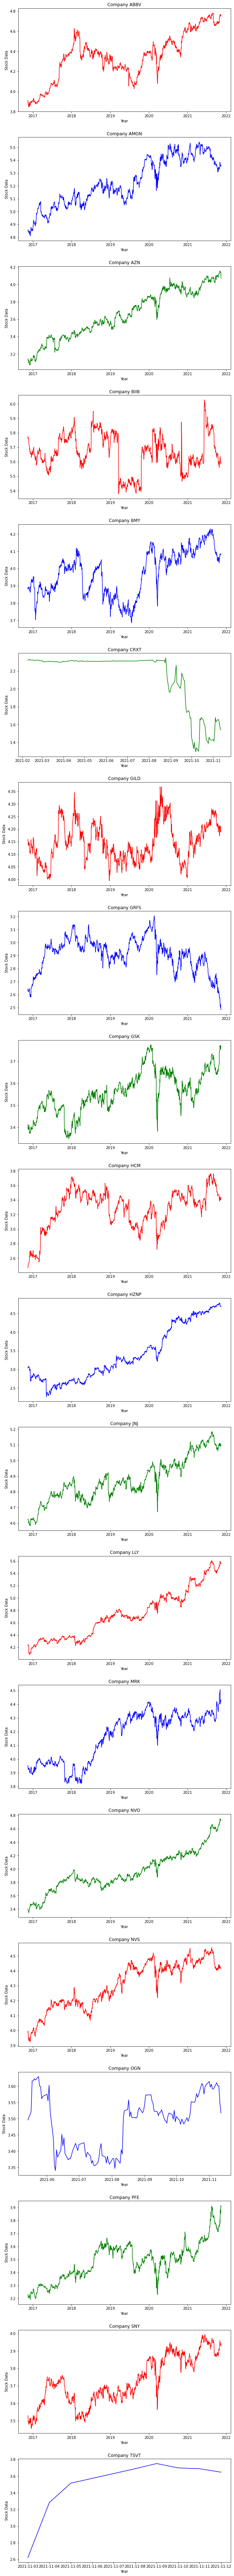

In [182]:
import matplotlib.pyplot as plt
# Tickers change
def test(to_plot,ax, i, c,s):
    #fig,ax = plt.subplots(1,2)
    #plt.subplot(1,2,2)
    #plt.plot(month, customer1, color="red", label="Customer 1", marker="o")
    ax[i].plot(p.index, p.values, color=c)
    ax[i].set_xlabel("Year")
    # ax[r_count,c_count].xticks(rotation=90)
    ax[i].set_ylabel("Stock Data")
    ax[i].set_title(f"Company {s}")
    #plt.show()

# rows= 2
# cols= 2    
fig,ax = plt.subplots(len(stk_tickers), 1, constrained_layout=True, figsize=(10,100))
fig.tight_layout(pad=5)
#fig.autofmt_xdate(rotation=90)
colors= ["red", "blue", "green"]
# r_count=0
# c_count=0

for i, s in enumerate(stk_tickers):
    p= np.log(stk_data.loc[:, ('Adj Close', s)])
    test(p, ax, i, colors[i%len(colors)], s)
#     if c_count >= cols-1:
#         c_count=0
#         r_count+=1
#     else:
#         c_count+=1
#     print(i,s,p)
#     print(p.values)

#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [183]:
np.log(stk_data.loc[:, ('Adj Close', 'PFE')]).diff(5).shift(-5)
#Vamos a generar la variable Y: Es el rendimiento semanal de MSFT en t+1
#Shift -5 les sube el dato 5 peridos. Dado que la base de menor a mayor tiempoe
#El hacer shift -5, les pone el dato de t+5 en t. (Para hacerlo supervisado)

Date
2016-11-15   -0.028322
2016-11-16   -0.017040
2016-11-17   -0.001262
2016-11-18    0.001904
2016-11-21    0.011025
                ...   
2021-11-08         NaN
2021-11-09         NaN
2021-11-10         NaN
2021-11-11         NaN
2021-11-12         NaN
Name: (Adj Close, PFE), Length: 1258, dtype: float64

<AxesSubplot:xlabel='Date'>

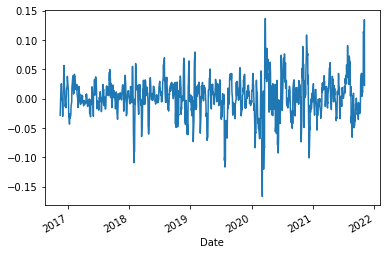

In [184]:
np.log(stk_data.loc[:, ('Adj Close', 'PFE')]).diff(5).shift(-5).plot()

C:\Users\silve\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  # This is added back by InteractiveShellApp.init_path()


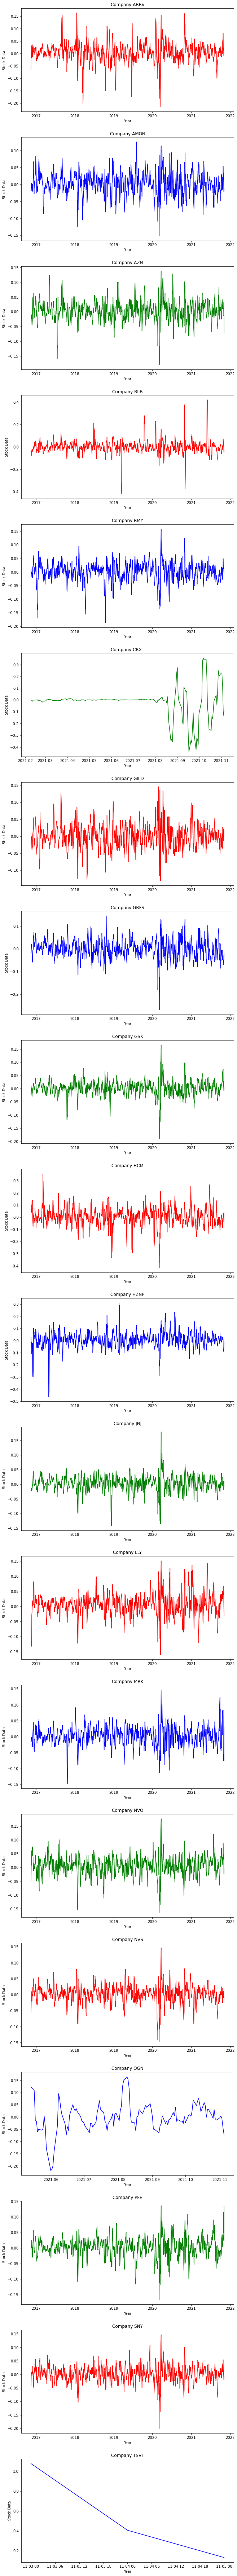

In [185]:
import matplotlib.pyplot as plt
# Tickers change
def test2(to_plot,ax, i, c,s):
    ax[i].plot(p.index, p.values, color=c)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Stock Data")
    ax[i].set_title(f"Company {s}")
    

fig,ax = plt.subplots(len(stk_tickers), 1, constrained_layout=True, figsize=(10,100))
fig.tight_layout(pad=5)
colors= ["red", "blue", "green"]

for i, s in enumerate(stk_tickers):
    p= np.log(stk_data.loc[:, ('Adj Close', s)]).diff(5).shift(-5)
    test2(p, ax, i, colors[i%len(colors)], s)
plt.show()

In [186]:
# Original
#Y = np.log(stk_data.loc[:, ('Adj Close', 'PFE')]).diff(return_period).shift(-return_period)

In [190]:
# All stocks stk_tickers
Y = np.log(stk_data.loc[:, ('Adj Close', stk_tickers)]).diff(return_period).shift(-return_period)

In [191]:
Y

Attributes Adj Close                                                         \
Symbols         ABBV      AMGN       AZN      BIIB       BMY CRXT      GILD   
Date                                                                          
2016-11-15 -0.064719 -0.018738 -0.044402 -0.013954 -0.002473  NaN -0.025065   
2016-11-16 -0.022347 -0.015055 -0.038316 -0.037594  0.009739  NaN -0.009253   
2016-11-17 -0.019475 -0.013184 -0.009183 -0.045164  0.005279  NaN -0.001854   
2016-11-18 -0.017670 -0.001102 -0.014485 -0.042598 -0.004414  NaN -0.001073   
2016-11-21  0.019180  0.003087 -0.023313 -0.050084 -0.006543  NaN -0.001468   
...              ...       ...       ...       ...       ...  ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN  NaN       NaN   

Attributes                                                              \
Symbols         GRFS       GSK       HCM      HZNP       JNJ       LLY   
Date                                                                     
2016-11-15 -0.016699 -0.023127  0.061621  0.016168 -0.024374 -0.017351   
2016-11-16  0.000000 -0.002098  0.049745  0.026619 -0.021795 -0.123518   
2016-11-17  0.000645  0.010607  0.045573 -0.005568 -0.014267 -0.117140   
2016-11-18  0.018065  0.004712  0.054537 -0.010801 -0.019520 -0.131838   
2016-11-21  0.021189 -0.004172  0.040021 -0.018824 -0.022157 -0.132190   
...              ...       ...       ...       ...       ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN       NaN   

Attributes                                                             
Symbols          MRK       NVO       NVS OGN       PFE       SNY TSVT  
Date                                                                   
2016-11-15 -0.031115 -0.049719 -0.054446 NaN -0.028322 -0.040079  NaN  
2016-11-16 -0.015933 -0.041265 -0.047952 NaN -0.017040 -0.042929  NaN  
2016-11-17 -0.007846 -0.023415 -0.041661 NaN -0.001262 -0.028457  NaN  
2016-11-18 -0.001132  0.003695 -0.022331 NaN  0.001904 -0.007523  NaN  
2016-11-21 -0.001767  0.014469 -0.016824 NaN  0.011025  0.006948  NaN  
...              ...       ...       ...  ..       ...       ...  ...  
2021-11-08       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-09       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-10       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-11       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-12       NaN       NaN       NaN NaN       NaN       NaN  NaN  

[1258 rows x 20 columns]

In [20]:
# Original
#Y.name = Y.name[-1]+'_pred'

In [201]:
# Y.columns = Y.columns[-1]+'_pred'
#X = X.set_axis(X_colnames, axis=1, inplace=False)
list_names=[]
for i in range(0,len(Y.columns)):
    list_names.append(stk_tickers[i]+'_pred')
list_names

['ABBV_pred',
 'AMGN_pred',
 'AZN_pred',
 'BIIB_pred',
 'BMY_pred',
 'CRXT_pred',
 'GILD_pred',
 'GRFS_pred',
 'GSK_pred',
 'HCM_pred',
 'HZNP_pred',
 'JNJ_pred',
 'LLY_pred',
 'MRK_pred',
 'NVO_pred',
 'NVS_pred',
 'OGN_pred',
 'PFE_pred',
 'SNY_pred',
 'TSVT_pred']

In [203]:
Y = Y.set_axis(list_names, axis=1, inplace=False)
Y

,ABBV_pred,AMGN_pred,AZN_pred,BIIB_pred,BMY_pred,CRXT_pred,GILD_pred,GRFS_pred,GSK_pred,HCM_pred,HZNP_pred,JNJ_pred,LLY_pred,MRK_pred,NVO_pred,NVS_pred,OGN_pred,PFE_pred,SNY_pred,TSVT_pred
Date,,,,,,,,,,,,,,,,,,,,
2016-11-15,-0.064719,-0.018738,-0.044402,-0.013954,-0.002473,NaN,-0.025065,-0.016699,-0.023127,0.061621,0.016168,-0.024374,-0.017351,-0.031115,-0.049719,-0.054446,NaN,-0.028322,-0.040079,NaN
2016-11-16,-0.022347,-0.015055,-0.038316,-0.037594,0.009739,NaN,-0.009253,0.000000,-0.002098,0.049745,0.026619,-0.021795,-0.123518,-0.015933,-0.041265,-0.047952,NaN,-0.017040,-0.042929,NaN
2016-11-17,-0.019475,-0.013184,-0.009183,-0.045164,0.005279,NaN,-0.001854,0.000645,0.010607,0.045573,-0.005568,-0.014267,-0.117140,-0.007846,-0.023415,-0.041661,NaN,-0.001262,-0.028457,NaN
2016-11-18,-0.017670,-0.001102,-0.014485,-0.042598,-0.004414,NaN,-0.001073,0.018065,0.004712,0.054537,-0.010801,-0.019520,-0.131838,-0.001132,0.003695,-0.022331,NaN,0.001904,-0.007523,NaN
2016-11-21,0.019180,0.003087,-0.023313,-0.050084,-0.006543,NaN,-0.001468,0.021189,-0.004172,0.040021,-0.018824,-0.022157,-0.132190,-0.001767,0.014469,-0.016824,NaN,0.011025,0.006948,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
Y

,ABBV_pred,AMGN_pred,AZN_pred,BIIB_pred,BMY_pred,CRXT_pred,GILD_pred,GRFS_pred,GSK_pred,HCM_pred,HZNP_pred,JNJ_pred,LLY_pred,MRK_pred,NVO_pred,NVS_pred,OGN_pred,PFE_pred,SNY_pred,TSVT_pred
Date,,,,,,,,,,,,,,,,,,,,
2016-11-15,-0.064719,-0.018738,-0.044402,-0.013954,-0.002473,NaN,-0.025065,-0.016699,-0.023127,0.061621,0.016168,-0.024374,-0.017351,-0.031115,-0.049719,-0.054446,NaN,-0.028322,-0.040079,NaN
2016-11-16,-0.022347,-0.015055,-0.038316,-0.037594,0.009739,NaN,-0.009253,0.000000,-0.002098,0.049745,0.026619,-0.021795,-0.123518,-0.015933,-0.041265,-0.047952,NaN,-0.017040,-0.042929,NaN
2016-11-17,-0.019475,-0.013184,-0.009183,-0.045164,0.005279,NaN,-0.001854,0.000645,0.010607,0.045573,-0.005568,-0.014267,-0.117140,-0.007846,-0.023415,-0.041661,NaN,-0.001262,-0.028457,NaN
2016-11-18,-0.017670,-0.001102,-0.014485,-0.042598,-0.004414,NaN,-0.001073,0.018065,0.004712,0.054537,-0.010801,-0.019520,-0.131838,-0.001132,0.003695,-0.022331,NaN,0.001904,-0.007523,NaN
2016-11-21,0.019180,0.003087,-0.023313,-0.050084,-0.006543,NaN,-0.001468,0.021189,-0.004172,0.040021,-0.018824,-0.022157,-0.132190,-0.001767,0.014469,-0.016824,NaN,0.011025,0.006948,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
X1 = np.log(stk_data.loc[:, ('Adj Close', stk_tickers)]).diff(return_period)
X1.columns = X1.columns.droplevel()

In [206]:
X1

Symbols,ABBV,AMGN,AZN,BIIB,BMY,CRXT,GILD,GRFS,GSK,HCM,HZNP,JNJ,LLY,MRK,NVO,NVS,OGN,PFE,SNY,TSVT
Date,,,,,,,,,,,,,,,,,,,,
2016-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,0.010829,0.007503,0.008450,0.002203,0.012364,0.227917,0.005015,-0.051453,0.004217,-0.002328,-0.089250,-0.000921,0.044021,-0.060539,0.046944,-0.009924,-0.003778,0.110818,-0.003711,NaN
2021-11-09,-0.007926,-0.011973,-0.013623,-0.009142,0.014057,0.229450,0.003786,-0.062249,-0.001637,-0.028318,-0.086888,-0.018775,0.019929,-0.073400,0.036316,-0.007912,0.004102,0.048637,-0.012986,NaN
2021-11-10,-0.006999,-0.022814,-0.010869,-0.046338,0.000505,0.101352,-0.001336,-0.049951,-0.008073,-0.040156,-0.072886,-0.004798,-0.006065,-0.054099,-0.024972,-0.005037,-0.005174,0.098313,-0.019482,1.076337


In [207]:
X2 = np.log(ccy_data).diff(return_period)

In [208]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2016-11-15,NaN,NaN
2016-11-16,NaN,NaN
2016-11-17,NaN,NaN
2016-11-18,NaN,NaN
2016-11-21,NaN,NaN
...,...,...
2021-11-01,0.004300,-0.006848
2021-11-02,-0.003597,-0.011686
2021-11-03,0.002722,-0.005840


In [209]:
X3 = np.log(idx_data).diff(return_period)

In [210]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2016-11-15,NaN,NaN,NaN
2016-11-16,NaN,NaN,NaN
2016-11-17,NaN,NaN,NaN
2016-11-18,NaN,NaN,NaN
2016-11-21,NaN,NaN,NaN
...,...,...,...
2021-11-08,0.018901,0.014331,0.048181
2021-11-09,0.011722,0.007388,0.103612
2021-11-10,-0.002978,-0.002150,0.215432


In [48]:
# #Nos generfa rezagos de una semana, tres semanas , 6 semanas y 12 semanas. 
# X4 = pd.concat(
#     [np.log(stk_data.loc[:, ('Adj Close', stk_tickers)]).diff(i)
#         for i in [return_period, return_period*3,return_period*6, return_period*12]], axis=1).dropna()

In [211]:
#Nos generfa rezagos de una semana, tres semanas , 6 semanas y 12 semanas. 
X4=[]
for i in stk_tickers:
    temp = pd.concat([np.log(stk_data.loc[:, ('Adj Close', i)]).diff(j)
               for j in [return_period, return_period*3,return_period*6, return_period*12]], axis=1).dropna()
    X4.append(temp)

In [79]:
# TEST
# X4[0].columns = X4[0].columns.droplevel()
# This does not work in this case: #X4[0].reset_index(level=0, drop=True)
# X4[0].head()

,ABBV,ABBV,ABBV,ABBV
Date,,,,
2017-02-13,-0.002311,-0.007409,-0.025992,-0.028221
2017-02-14,0.004284,0.003954,-0.019127,-0.001729
2017-02-15,0.018499,0.004389,-0.002213,0.009228
2017-02-16,0.010465,0.003422,-0.018976,0.025777
2017-02-17,0.022098,0.029073,-0.021826,0.032137


In [212]:
for i in range(0,len(X4)):
    X4[i].columns= X4[i].columns.droplevel()
    X4[i].index.name = None
    X4[i].columns = [f'{stk_tickers[i]}_DT', f'{stk_tickers[i]}_3DT', f'{stk_tickers[i]}_6DT', f'{stk_tickers[i]}_12DT']

In [213]:
X4[0].head()

,ABBV_DT,ABBV_3DT,ABBV_6DT,ABBV_12DT
2017-02-13,-0.002311,-0.007409,-0.025992,-0.028221
2017-02-14,0.004284,0.003954,-0.019127,-0.001729
2017-02-15,0.018499,0.004389,-0.002213,0.009229
2017-02-16,0.010464,0.003422,-0.018976,0.025777
2017-02-17,0.022098,0.029073,-0.021826,0.032137


In [214]:
temp2 = X4[0]
temp2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1198 entries, 2017-02-13 to 2021-11-12
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABBV_DT    1198 non-null   float64
 1   ABBV_3DT   1198 non-null   float64
 2   ABBV_6DT   1198 non-null   float64
 3   ABBV_12DT  1198 non-null   float64
dtypes: float64(4)
memory usage: 46.8 KB


In [215]:
# TEST 2
temp3= pd.DataFrame()
temp2= pd.DataFrame()
for i in range(0,len(X4)):
    temp2= X4[i]
    temp3= pd.concat([temp3,temp2], axis=1)
#     temp2 = pd.concat(temp2, X4[i], axis=1)


In [216]:
X4 = temp3
X4.head()

,ABBV_DT,ABBV_3DT,ABBV_6DT,ABBV_12DT,AMGN_DT,AMGN_3DT,AMGN_6DT,AMGN_12DT,AZN_DT,AZN_3DT,...,PFE_6DT,PFE_12DT,SNY_DT,SNY_3DT,SNY_6DT,SNY_12DT,TSVT_DT,TSVT_3DT,TSVT_6DT,TSVT_12DT
2017-02-13,-0.002311,-0.007409,-0.025992,-0.028221,0.013336,0.100205,0.133087,0.137971,0.053711,0.089591,...,0.013823,0.021858,0.045692,0.056329,0.068842,0.024993,NaN,NaN,NaN,NaN
2017-02-14,0.004284,0.003954,-0.019127,-0.001729,0.014219,0.108242,0.146090,0.139139,0.045989,0.091970,...,0.018415,0.034554,0.060493,0.073748,0.055784,0.037893,NaN,NaN,NaN,NaN
2017-02-15,0.018499,0.004389,-0.002213,0.009229,0.028468,0.115544,0.137656,0.160267,0.040290,0.087875,...,0.025473,0.064717,0.050626,0.083181,0.055247,0.055978,NaN,NaN,NaN,NaN
2017-02-16,0.010464,0.003422,-0.018976,0.025777,0.034203,0.124700,0.125419,0.176688,0.014030,0.106205,...,0.020000,0.075905,0.019481,0.097126,0.063773,0.084051,NaN,NaN,NaN,NaN
2017-02-17,0.022098,0.029073,-0.021826,0.032137,0.038531,0.104575,0.131533,0.181320,0.020023,0.107743,...,0.010434,0.073050,0.013764,0.079039,0.039221,0.072043,NaN,NaN,NaN,NaN


In [119]:
# X4.columns = [f'{stk_tickers}_DT', f'{stk_tickers}_3DT', f'{stk_tickers}_6DT', f'{stk_tickers}_12DT']

In [217]:
X4

,ABBV_DT,ABBV_3DT,ABBV_6DT,ABBV_12DT,AMGN_DT,AMGN_3DT,AMGN_6DT,AMGN_12DT,AZN_DT,AZN_3DT,...,PFE_6DT,PFE_12DT,SNY_DT,SNY_3DT,SNY_6DT,SNY_12DT,TSVT_DT,TSVT_3DT,TSVT_6DT,TSVT_12DT
2017-02-13,-0.002311,-0.007409,-0.025992,-0.028221,0.013336,0.100205,0.133087,0.137971,0.053711,0.089591,...,0.013823,0.021858,0.045692,0.056329,0.068842,0.024993,NaN,NaN,NaN,NaN
2017-02-14,0.004284,0.003954,-0.019127,-0.001729,0.014219,0.108242,0.146090,0.139139,0.045989,0.091970,...,0.018415,0.034554,0.060493,0.073748,0.055784,0.037893,NaN,NaN,NaN,NaN
2017-02-15,0.018499,0.004389,-0.002213,0.009229,0.028468,0.115544,0.137656,0.160267,0.040290,0.087875,...,0.025473,0.064717,0.050626,0.083181,0.055247,0.055978,NaN,NaN,NaN,NaN
2017-02-16,0.010464,0.003422,-0.018976,0.025777,0.034203,0.124700,0.125419,0.176688,0.014030,0.106205,...,0.020000,0.075905,0.019481,0.097126,0.063773,0.084051,NaN,NaN,NaN,NaN
2017-02-17,0.022098,0.029073,-0.021826,0.032137,0.038531,0.104575,0.131533,0.181320,0.020023,0.107743,...,0.010434,0.073050,0.013764,0.079039,0.039221,0.072043,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,0.010829,0.077268,0.086623,0.008438,0.007503,0.039764,-0.008198,-0.075385,0.008450,0.060535,...,0.112423,0.005641,-0.003711,0.062154,0.060282,-0.012637,NaN,NaN,NaN,NaN
2021-11-09,-0.007926,0.073197,0.086272,-0.011880,-0.011973,0.023562,-0.002642,-0.087503,-0.013623,0.041188,...,0.103120,-0.024732,-0.012986,0.064460,0.067795,-0.011830,NaN,NaN,NaN,NaN
2021-11-10,-0.006999,0.074115,0.082207,-0.012569,-0.022814,0.016790,-0.007895,-0.081005,-0.010869,0.040565,...,0.127518,-0.019420,-0.019482,0.045630,0.059590,-0.023675,NaN,NaN,NaN,NaN
2021-11-11,-0.003680,0.069863,0.090130,0.006408,-0.015804,0.012222,-0.005139,-0.069736,-0.014359,0.027390,...,0.162923,0.026229,-0.004645,0.046455,0.066986,-0.020924,NaN,NaN,NaN,NaN


In [218]:
X = pd.concat([X1, X2, X3, X4], axis=1)

In [219]:
len(X)

1304

In [220]:
X=X.dropna(axis=1, how='all')

In [221]:
X

,ABBV,AMGN,AZN,BIIB,BMY,CRXT,GILD,GRFS,GSK,HCM,...,OGN_6DT,OGN_12DT,PFE_DT,PFE_3DT,PFE_6DT,PFE_12DT,SNY_DT,SNY_3DT,SNY_6DT,SNY_12DT
2016-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,0.010829,0.007503,0.008450,0.002203,0.012364,0.227917,0.005015,-0.051453,0.004217,-0.002328,...,0.097909,0.086375,0.110818,0.165445,0.112423,0.005641,-0.003711,0.062154,0.060282,-0.012637
2021-11-09,-0.007926,-0.011973,-0.013623,-0.009142,0.014057,0.229450,0.003786,-0.062249,-0.001637,-0.028318,...,0.103422,0.073366,0.048637,0.125440,0.103120,-0.024732,-0.012986,0.064460,0.067795,-0.011830
2021-11-10,-0.006999,-0.022814,-0.010869,-0.046338,0.000505,0.101352,-0.001336,-0.049951,-0.008073,-0.040156,...,0.075096,0.042966,0.098313,0.144430,0.127518,-0.019420,-0.019482,0.045630,0.059590,-0.023675
2021-11-11,-0.003680,-0.015804,-0.014359,-0.050616,-0.001013,-0.131402,0.014339,-0.035864,0.005335,-0.020098,...,0.057192,0.041332,0.134842,0.166417,0.162923,0.026229,-0.004645,0.046455,0.066986,-0.020924


In [222]:
X_colnames=X.columns
X_colnames

Index(['ABBV', 'AMGN', 'AZN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS', 'GSK',
       'HCM',
       ...
       'OGN_6DT', 'OGN_12DT', 'PFE_DT', 'PFE_3DT', 'PFE_6DT', 'PFE_12DT',
       'SNY_DT', 'SNY_3DT', 'SNY_6DT', 'SNY_12DT'],
      dtype='object', length=101)

In [223]:
X_rows= X.axes[0].tolist()
X_rows

[Timestamp('2016-11-15 00:00:00', freq='B'),
 Timestamp('2016-11-16 00:00:00', freq='B'),
 Timestamp('2016-11-17 00:00:00', freq='B'),
 Timestamp('2016-11-18 00:00:00', freq='B'),
 Timestamp('2016-11-21 00:00:00', freq='B'),
 Timestamp('2016-11-22 00:00:00', freq='B'),
 Timestamp('2016-11-23 00:00:00', freq='B'),
 Timestamp('2016-11-24 00:00:00', freq='B'),
 Timestamp('2016-11-25 00:00:00', freq='B'),
 Timestamp('2016-11-28 00:00:00', freq='B'),
 Timestamp('2016-11-29 00:00:00', freq='B'),
 Timestamp('2016-11-30 00:00:00', freq='B'),
 Timestamp('2016-12-01 00:00:00', freq='B'),
 Timestamp('2016-12-02 00:00:00', freq='B'),
 Timestamp('2016-12-05 00:00:00', freq='B'),
 Timestamp('2016-12-06 00:00:00', freq='B'),
 Timestamp('2016-12-07 00:00:00', freq='B'),
 Timestamp('2016-12-08 00:00:00', freq='B'),
 Timestamp('2016-12-09 00:00:00', freq='B'),
 Timestamp('2016-12-12 00:00:00', freq='B'),
 Timestamp('2016-12-13 00:00:00', freq='B'),
 Timestamp('2016-12-14 00:00:00', freq='B'),
 Timestamp

In [224]:
Y_colnames=Y.columns
Y_colnames

Index(['ABBV_pred', 'AMGN_pred', 'AZN_pred', 'BIIB_pred', 'BMY_pred',
       'CRXT_pred', 'GILD_pred', 'GRFS_pred', 'GSK_pred', 'HCM_pred',
       'HZNP_pred', 'JNJ_pred', 'LLY_pred', 'MRK_pred', 'NVO_pred', 'NVS_pred',
       'OGN_pred', 'PFE_pred', 'SNY_pred', 'TSVT_pred'],
      dtype='object')

In [225]:
Y_rows= Y.axes[0].tolist()
Y_rows

[Timestamp('2016-11-15 00:00:00'),
 Timestamp('2016-11-16 00:00:00'),
 Timestamp('2016-11-17 00:00:00'),
 Timestamp('2016-11-18 00:00:00'),
 Timestamp('2016-11-21 00:00:00'),
 Timestamp('2016-11-22 00:00:00'),
 Timestamp('2016-11-23 00:00:00'),
 Timestamp('2016-11-25 00:00:00'),
 Timestamp('2016-11-28 00:00:00'),
 Timestamp('2016-11-29 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2016-12-02 00:00:00'),
 Timestamp('2016-12-05 00:00:00'),
 Timestamp('2016-12-06 00:00:00'),
 Timestamp('2016-12-07 00:00:00'),
 Timestamp('2016-12-08 00:00:00'),
 Timestamp('2016-12-09 00:00:00'),
 Timestamp('2016-12-12 00:00:00'),
 Timestamp('2016-12-13 00:00:00'),
 Timestamp('2016-12-14 00:00:00'),
 Timestamp('2016-12-15 00:00:00'),
 Timestamp('2016-12-16 00:00:00'),
 Timestamp('2016-12-19 00:00:00'),
 Timestamp('2016-12-20 00:00:00'),
 Timestamp('2016-12-21 00:00:00'),
 Timestamp('2016-12-22 00:00:00'),
 Timestamp('2016-12-23 00:00:00'),
 Timestamp('2016-12-

In [226]:
# Missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X)
X= imputer.transform(X)
Y= imputer.fit_transform(Y)




# X_imputed_df = pd.DataFrame(X_imputed, columns = X_train.columns)

In [227]:
X= pd.DataFrame(X)

In [228]:
X

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
1,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
2,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
3,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
4,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,0.010829,0.007503,0.008450,0.002203,0.012364,0.227917,0.005015,-0.051453,0.004217,-0.002328,...,0.097909,0.086375,0.110818,0.165445,0.112423,0.005641,-0.003711,0.062154,0.060282,-0.012637
1300,-0.007926,-0.011973,-0.013623,-0.009142,0.014057,0.229450,0.003786,-0.062249,-0.001637,-0.028318,...,0.103422,0.073366,0.048637,0.125440,0.103120,-0.024732,-0.012986,0.064460,0.067795,-0.011830
1301,-0.006999,-0.022814,-0.010869,-0.046338,0.000505,0.101352,-0.001336,-0.049951,-0.008073,-0.040156,...,0.075096,0.042966,0.098313,0.144430,0.127518,-0.019420,-0.019482,0.045630,0.059590,-0.023675
1302,-0.003680,-0.015804,-0.014359,-0.050616,-0.001013,-0.131402,0.014339,-0.035864,0.005335,-0.020098,...,0.057192,0.041332,0.134842,0.166417,0.162923,0.026229,-0.004645,0.046455,0.066986,-0.020924


In [229]:
Y= pd.DataFrame(Y)

In [230]:
Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.064719,-0.018738,-0.044402,-0.013954,-0.002473,-0.019162,-0.025065,-0.016699,-0.023127,0.061621,0.016168,-0.024374,-0.017351,-0.031115,-0.049719,-0.054446,0.000046,-0.028322,-0.040079,0.538194
1,-0.022347,-0.015055,-0.038316,-0.037594,0.009739,-0.019162,-0.009253,0.000000,-0.002098,0.049745,0.026619,-0.021795,-0.123518,-0.015933,-0.041265,-0.047952,0.000046,-0.017040,-0.042929,0.538194
2,-0.019475,-0.013184,-0.009183,-0.045164,0.005279,-0.019162,-0.001854,0.000645,0.010607,0.045573,-0.005568,-0.014267,-0.117140,-0.007846,-0.023415,-0.041661,0.000046,-0.001262,-0.028457,0.538194
3,-0.017670,-0.001102,-0.014485,-0.042598,-0.004414,-0.019162,-0.001073,0.018065,0.004712,0.054537,-0.010801,-0.019520,-0.131838,-0.001132,0.003695,-0.022331,0.000046,0.001904,-0.007523,0.538194
4,0.019180,0.003087,-0.023313,-0.050084,-0.006543,-0.019162,-0.001468,0.021189,-0.004172,0.040021,-0.018824,-0.022157,-0.132190,-0.001767,0.014469,-0.016824,0.000046,0.011025,0.006948,0.538194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,0.006495,0.001890,0.005302,0.001942,0.005381,0.001745,0.000046,0.002680,0.001692,0.538194
1254,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,0.006495,0.001890,0.005302,0.001942,0.005381,0.001745,0.000046,0.002680,0.001692,0.538194
1255,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,0.006495,0.001890,0.005302,0.001942,0.005381,0.001745,0.000046,0.002680,0.001692,0.538194
1256,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,0.006495,0.001890,0.005302,0.001942,0.005381,0.001745,0.000046,0.002680,0.001692,0.538194


In [231]:
# test = pd.DataFrame(X, index=X_rows, columns=X_colnames)
# test

X = X.set_axis(X_colnames, axis=1, inplace=False)
X = X.set_axis(X_rows, axis=0, inplace=False)
X

,ABBV,AMGN,AZN,BIIB,BMY,CRXT,GILD,GRFS,GSK,HCM,...,OGN_6DT,OGN_12DT,PFE_DT,PFE_3DT,PFE_6DT,PFE_12DT,SNY_DT,SNY_3DT,SNY_6DT,SNY_12DT
2016-11-15,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
2016-11-16,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
2016-11-17,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
2016-11-18,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
2016-11-21,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,0.010829,0.007503,0.008450,0.002203,0.012364,0.227917,0.005015,-0.051453,0.004217,-0.002328,...,0.097909,0.086375,0.110818,0.165445,0.112423,0.005641,-0.003711,0.062154,0.060282,-0.012637
2021-11-09,-0.007926,-0.011973,-0.013623,-0.009142,0.014057,0.229450,0.003786,-0.062249,-0.001637,-0.028318,...,0.103422,0.073366,0.048637,0.125440,0.103120,-0.024732,-0.012986,0.064460,0.067795,-0.011830
2021-11-10,-0.006999,-0.022814,-0.010869,-0.046338,0.000505,0.101352,-0.001336,-0.049951,-0.008073,-0.040156,...,0.075096,0.042966,0.098313,0.144430,0.127518,-0.019420,-0.019482,0.045630,0.059590,-0.023675
2021-11-11,-0.003680,-0.015804,-0.014359,-0.050616,-0.001013,-0.131402,0.014339,-0.035864,0.005335,-0.020098,...,0.057192,0.041332,0.134842,0.166417,0.162923,0.026229,-0.004645,0.046455,0.066986,-0.020924


In [232]:
Y = Y.set_axis(Y_colnames, axis=1, inplace=False)
Y = Y.set_axis(Y_rows, axis=0, inplace=False)
Y

,ABBV_pred,AMGN_pred,AZN_pred,BIIB_pred,BMY_pred,CRXT_pred,GILD_pred,GRFS_pred,GSK_pred,HCM_pred,HZNP_pred,JNJ_pred,LLY_pred,MRK_pred,NVO_pred,NVS_pred,OGN_pred,PFE_pred,SNY_pred,TSVT_pred
2016-11-15,-0.064719,-0.018738,-0.044402,-0.013954,-0.002473,-0.019162,-0.025065,-0.016699,-0.023127,0.061621,0.016168,-0.024374,-0.017351,-0.031115,-0.049719,-0.054446,0.000046,-0.028322,-0.040079,0.538194
2016-11-16,-0.022347,-0.015055,-0.038316,-0.037594,0.009739,-0.019162,-0.009253,0.000000,-0.002098,0.049745,0.026619,-0.021795,-0.123518,-0.015933,-0.041265,-0.047952,0.000046,-0.017040,-0.042929,0.538194
2016-11-17,-0.019475,-0.013184,-0.009183,-0.045164,0.005279,-0.019162,-0.001854,0.000645,0.010607,0.045573,-0.005568,-0.014267,-0.117140,-0.007846,-0.023415,-0.041661,0.000046,-0.001262,-0.028457,0.538194
2016-11-18,-0.017670,-0.001102,-0.014485,-0.042598,-0.004414,-0.019162,-0.001073,0.018065,0.004712,0.054537,-0.010801,-0.019520,-0.131838,-0.001132,0.003695,-0.022331,0.000046,0.001904,-0.007523,0.538194
2016-11-21,0.019180,0.003087,-0.023313,-0.050084,-0.006543,-0.019162,-0.001468,0.021189,-0.004172,0.040021,-0.018824,-0.022157,-0.132190,-0.001767,0.014469,-0.016824,0.000046,0.011025,0.006948,0.538194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,0.006495,0.001890,0.005302,0.001942,0.005381,0.001745,0.000046,0.002680,0.001692,0.538194
2021-11-09,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,0.006495,0.001890,0.005302,0.001942,0.005381,0.001745,0.000046,0.002680,0.001692,0.538194
2021-11-10,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,0.006495,0.001890,0.005302,0.001942,0.005381,0.001745,0.000046,0.002680,0.001692,0.538194
2021-11-11,0.003469,0.002015,0.003970,-0.000675,0.000784,-0.019162,0.000216,-0.000505,0.001451,0.003670,0.006495,0.001890,0.005302,0.001942,0.005381,0.001745,0.000046,0.002680,0.001692,0.538194


In [233]:
#"inicia:termina:brincos " #Esto nos va a dejar con sólo semanas. 
# dataset = pd.concat([Y, X], axis=1).dropna(axis=0).iloc[::return_period, :]
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]

In [234]:
dataset
#Ahora sólo 225 observaciones (puras semanas)

,ABBV_pred,AMGN_pred,AZN_pred,BIIB_pred,BMY_pred,CRXT_pred,GILD_pred,GRFS_pred,GSK_pred,HCM_pred,...,OGN_6DT,OGN_12DT,PFE_DT,PFE_3DT,PFE_6DT,PFE_12DT,SNY_DT,SNY_3DT,SNY_6DT,SNY_12DT
2016-11-15,-0.064719,-0.018738,-0.044402,-0.013954,-0.002473,-0.019162,-0.025065,-0.016699,-0.023127,0.061621,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
2016-11-22,0.031239,-0.001803,-0.011033,-0.078579,-0.001947,-0.019162,-0.010260,0.012231,-0.006594,0.097842,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
2016-11-30,-0.013412,-0.020193,-0.011156,-0.030277,-0.021491,-0.019162,-0.012562,-0.058227,-0.006371,0.066388,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
2016-12-07,0.027620,0.051758,0.054210,0.003324,0.057340,-0.019162,0.045887,0.002058,0.010859,-0.002030,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
2016-12-14,-0.003574,-0.017093,-0.008464,-0.011030,0.003242,-0.019162,-0.023386,0.074598,0.004469,-0.052864,...,0.075944,0.090475,0.002703,0.007470,0.013561,0.028160,0.001699,0.005296,0.009969,0.020390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-13,0.010944,0.029281,0.002973,-0.062104,0.017371,-0.070479,-0.011451,-0.005772,0.016867,0.002485,...,-0.022077,0.121176,-0.014382,-0.059289,-0.106398,0.017989,0.000415,-0.005377,-0.071230,-0.063864
2021-10-20,-0.000092,-0.014799,0.018628,-0.025148,-0.027586,-0.157876,-0.001347,-0.037601,0.024037,-0.045058,...,0.022339,0.213650,0.032774,-0.016912,-0.083129,0.025507,0.017066,0.013960,-0.021580,-0.050681
2021-10-27,0.081206,0.054403,0.032806,0.072835,0.049557,0.066615,0.009540,-0.028965,0.074126,0.014180,...,0.057620,0.199227,0.003964,0.022357,-0.041036,-0.061158,0.010546,0.028027,0.031977,-0.038196
2021-11-03,-0.006999,-0.022814,-0.010869,-0.046338,0.000505,0.101352,-0.001336,-0.049951,-0.008073,-0.040156,...,0.120196,0.201490,0.042152,0.078891,0.019602,-0.072497,0.054566,0.082178,0.076801,0.028679


In [235]:
Y = dataset.loc[:,Y.columns]

In [236]:
X = dataset.loc[:, X.columns]

In [237]:
dataset.head()

,ABBV_pred,AMGN_pred,AZN_pred,BIIB_pred,BMY_pred,CRXT_pred,GILD_pred,GRFS_pred,GSK_pred,HCM_pred,...,OGN_6DT,OGN_12DT,PFE_DT,PFE_3DT,PFE_6DT,PFE_12DT,SNY_DT,SNY_3DT,SNY_6DT,SNY_12DT
2016-11-15,-0.064719,-0.018738,-0.044402,-0.013954,-0.002473,-0.019162,-0.025065,-0.016699,-0.023127,0.061621,...,0.075944,0.090475,0.002703,0.00747,0.013561,0.02816,0.001699,0.005296,0.009969,0.02039
2016-11-22,0.031239,-0.001803,-0.011033,-0.078579,-0.001947,-0.019162,-0.010260,0.012231,-0.006594,0.097842,...,0.075944,0.090475,0.002703,0.00747,0.013561,0.02816,0.001699,0.005296,0.009969,0.02039
2016-11-30,-0.013412,-0.020193,-0.011156,-0.030277,-0.021491,-0.019162,-0.012562,-0.058227,-0.006371,0.066388,...,0.075944,0.090475,0.002703,0.00747,0.013561,0.02816,0.001699,0.005296,0.009969,0.02039
2016-12-07,0.027620,0.051758,0.054210,0.003324,0.057340,-0.019162,0.045887,0.002058,0.010859,-0.002030,...,0.075944,0.090475,0.002703,0.00747,0.013561,0.02816,0.001699,0.005296,0.009969,0.02039
2016-12-14,-0.003574,-0.017093,-0.008464,-0.011030,0.003242,-0.019162,-0.023386,0.074598,0.004469,-0.052864,...,0.075944,0.090475,0.002703,0.00747,0.013561,0.02816,0.001699,0.005296,0.009969,0.02039


<AxesSubplot:title={'center':'Correlation Matrix'}>

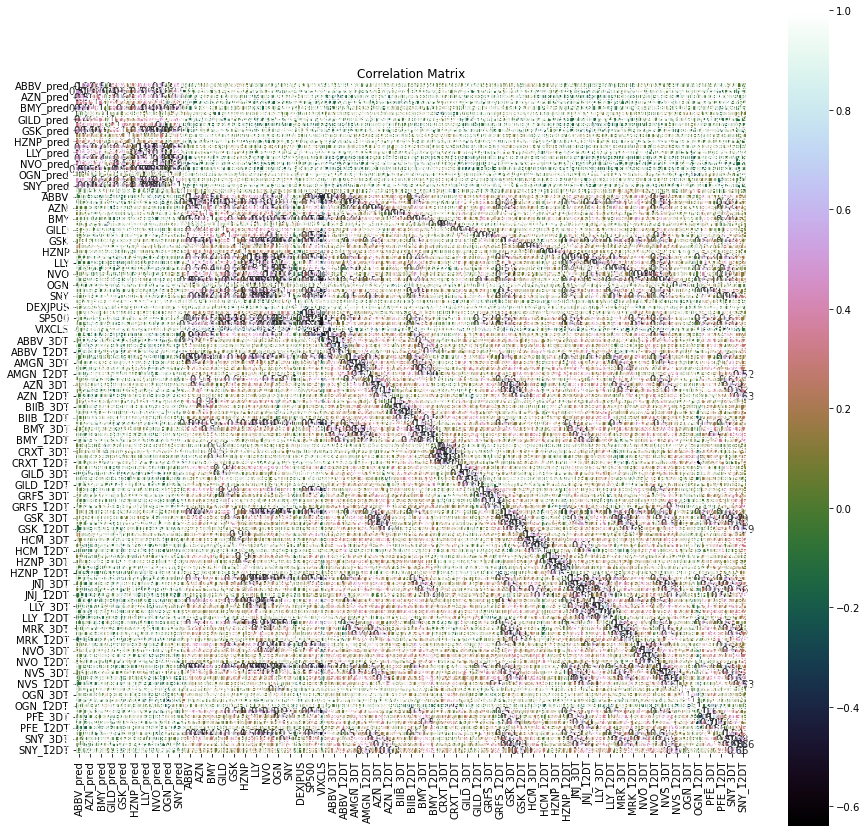

In [238]:
# Correlation matrix
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [239]:
# This part needs to be for each individual part-LG
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()

KeyboardInterrupt: 

<Figure size 1080x1080 with 0 Axes>

Error in callback <function flush_figures at 0x0000015036867948> (for post_execute):


KeyboardInterrupt: 

In [34]:

res = sm.tsa.seasonal_decompose(Y,period=52)

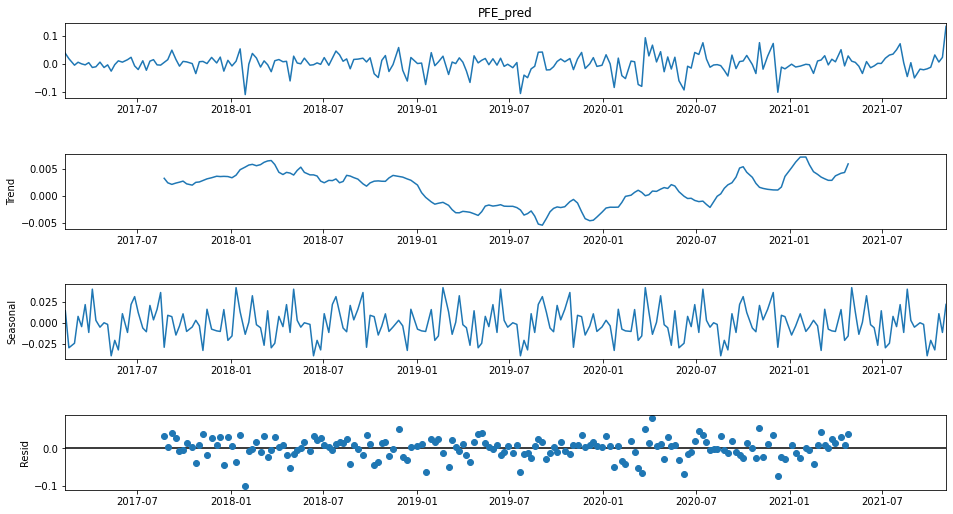

In [35]:
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [36]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [37]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [38]:

#Sin tuning de hiperparámetros
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [39]:
models.append(('MLP', MLPRegressor()))
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor())) 
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [40]:
from random import seed

In [41]:
seed(1)

In [42]:
names = []
kfold_results = [] 
test_results = [] 
train_results = []
for name, model in models:
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds)
    #converted mean squared error to positive. The lower the better
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train) 
    train_results.append(train_result)
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test) 
    test_results.append(test_result)

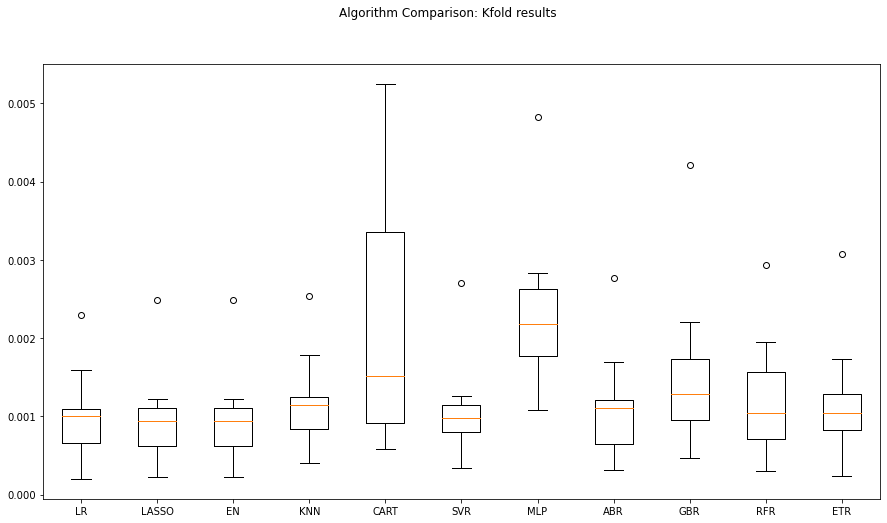

In [43]:

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

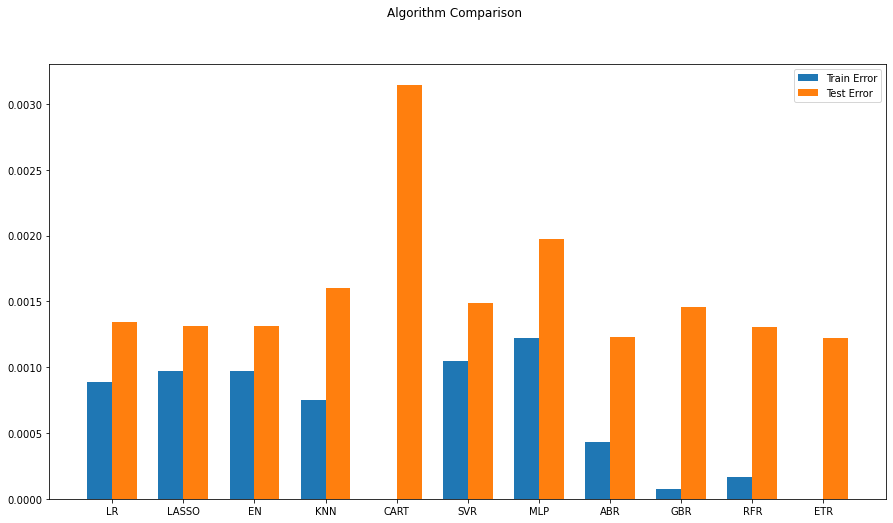

In [44]:
# Compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [45]:
#ahora vamos a hacer un ARIMA
#ya no es necesario meterle rezagos de MSFT
# X_train_ARIMA=X_train.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
# X_test_ARIMA=X_test.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]

X_train_ARIMA=X_train.loc[:, ['ABBV', 'AMGN', 'AZN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS','GSK', 'HCM', 'HZNP', 'JNJ', 'LLY', 'MRK','NVO','NVS', 'OGN','PFE','SNY','TSVT']]
X_test_ARIMA=X_test.loc[:, ['ABBV', 'AMGN', 'AZN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS','GSK', 'HCM', 'HZNP', 'JNJ', 'LLY', 'MRK','NVO','NVS', 'OGN','PFE','SNY','TSVT']]

tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

KeyError: "['ABBV', 'AMGN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS', 'GSK', 'HCM', 'HZNP', 'JNJ', 'LLY', 'MRK', 'NVO', 'NVS', 'OGN', 'SNY', 'TSVT'] not in index"

In [ ]:
X_train_ARIMA

In [ ]:
X_train_ARIMA.index=pd.DatetimeIndex(X_train_ARIMA.index).to_period('W')

In [ ]:

Y_train.index=pd.DatetimeIndex(Y_train.index).to_period('W')

In [ ]:
#Cuando hay variables exógeneas se dice que es un ARIMAX
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

In [ ]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)

In [ ]:

predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

In [ ]:
#vamos a agregar una RNN LSTM
seq_len = 2 #Length of the seq for the LSTM
Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test) 
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))

In [ ]:
X_test_LSTM.shape

In [ ]:

X_test_LSTM

In [ ]:
for i in range(seq_len):
        X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
        X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [ ]:
X_test_LSTM.shape

In [ ]:

X_test_LSTM

In [ ]:

# LSTM Network
def create_LSTMmodel(learn_rate = 0.01, momentum=0): # create model
        model = Sequential()
        model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1],X_train_LSTM.shape[2])))
        model.add(Dense(1))

        #More cells can be added if needed model.add(Dense(1))
        optimizer = SGD(lr=learn_rate, momentum=momentum) 
        model.compile(loss='mse', optimizer='adam')
        return model
LSTMModel = create_LSTMmodel(learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)

In [ ]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train', )
pyplot.plot(LSTMModel_fit.history['val_loss'], '--',label='test',)
pyplot.legend()
pyplot.show()

In [ ]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM,LSTMModel.predict(X_train_LSTM))

In [ ]:
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

In [ ]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)
train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)
names.append("ARIMA")
names.append("LSTM")

In [ ]:
# correr estos
#'ABBV', 'AMGN', 'AZN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS','GSK',
#'HCM', 'HZNP', 'JNJ', 'LLY', 'MRK','NVO','NVS', 'OGN','PFE','SNY','TSVT'

In [ ]:

# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
def evaluate_arima_model(arima_order):
#predicted = list() 
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order) 
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q) 
                try:
                    mse = evaluate_arima_model(order) 
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except: 
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
#warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

In [ ]:
# ARIMA(2, 0, 1) MSE=0.0009632

In [ ]:
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()
# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

In [ ]:

# plotting the actual data versus predicted data
predicted_tuned.index = Y_test.index
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual',)
# plotting t, a separately
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b--', label='predicted')
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.show()